# Module 1 Peer Review Assignment Rubric

This is the rubric for the module 2 peer review assessment. Do your best to interpret what has been written by fellow students and give them the benefit of the doubt when it comes to understanding with an eye towards improvement. You can give partial credit if you feel the mistakes were minor and/or partial comprehension attained. Be kind to your fellow students, if for no other reason than it will engender kindness in return. Grade each part out of 5 points.

# Problem 1

The Birthday Problem: This is a classic problem that has a nonintuitive answer.  Suppose there are $N$ students in a room. 

### 1(a)

What is the probability that at least two of them have the same birthday (month and day)?  (Assume that each day is equally likely
to be a student's birthday and that there are no sets of twins.)

#### Solution:

The sample space $S = \{x_1, x_2, \ldots, x_N \, | \, x_i \mbox{is the birthday of the $i^{th}$ student} \}$.  $S$ has $365^N$ elements. Let $A$ be the event that two or more students have the same birthday.  $A^c$, the complement of $A$, is the event
that no two students have the same birthday.  
\begin{eqnarray*}
P(A^c) = \frac{365 \cdot 364 \cdot 363 \cdots (365 - N + 1)}{365^N}
\end{eqnarray*}
Then, 
\begin{eqnarray*}
P(A) = 1- P(A^c) = 1  - \frac{365 \cdot 364 \cdot 363 \cdots (365 - N + 1)}{365^N}
\end{eqnarray*}

### 1(b)

How large must $N$ be so that the probability that at least two of them have the same birthday is at least 1/2?

#### Solution:

A bit of trial and error yields $P(A) \geq 1/2$ when $N\geq 23$.  (Or, this can be determined from the solution to part (c).)

### 1(c)

Plot the number of students on the $x$-axis versus the probability that at least two of them have the same birthday
on the $y$-axis.

#### Solution:

`
N = seq(1,100)
P_A = rep(0,100)
for (i in N){
    factor = 1
    for (j in seq(365,365-i+1)){
        factor = factor*j
    }
    P_A[i] = 1 - factor/(365^i)
}
plot(N,P_A, type = "l")
`

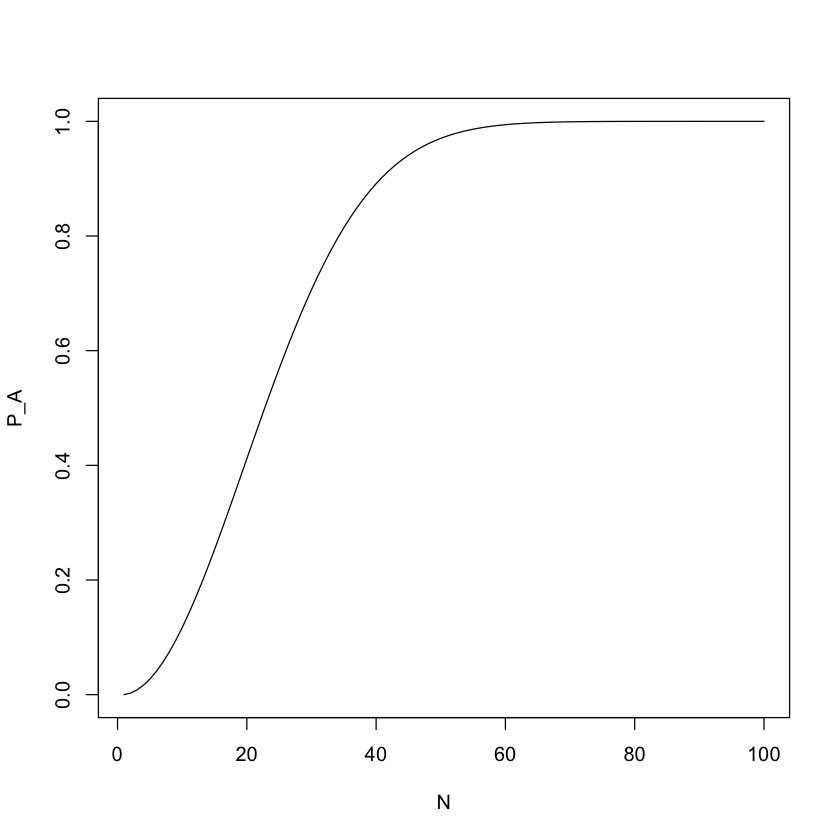

In [6]:
N = seq(1,100)
P_A = rep(0,100)
for (i in N){
    factor = 1
    for (j in seq(365,365-i+1)){
        factor = factor*j
    }
    P_A[i] = 1 - factor/(365^i)
}
plot(N,P_A, type = "l")

### 1(Thought Question)

Thought question: Would you be surprised if there were 100 students in the room and no two of them had the same birthday?  What
would that tell you about that set of students?

#### Solution:

After looking at the above plot one can see this would be quite surprising! At 100 students there is essentially a probability of 1 of finding a match. Having this result could indicate that this group of students is quite the outlier, or perhaps these students were quite so randomly chosen as assumed.

# Problem 2 

One of the most beneficial aspects of R, when it comes to probability, is that it allows us to simulate data and random events. In the following problem, you are going to become familiar with these simulation functions and techniques.

**Part a)** 

Let $X$ be a random variable for the number rolled on a fair, six-sided die. How would we go about simulating $X$?

Start by creating a list of numbers [1, 6]. Then use the `sample()` function with our list of numbers to simulate **a single** roll of the die, as in simulate $X$. We would recommend looking at the documentation for `sample()`, found [here](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sample), or by executing `?sample` in a Jupyter cell.

In [7]:
rolls = 1:6
sample(rolls, 1)

[1] 2

**Part b)** 

In our initial problem, we said that $X$ comes from a fair die, meaning each value is equally likely to be rolled. Because our die has $6$ sides, each side should appear about $1/6^{th}$ of the time. How would we confirm that our simulation is fair?

What if we generate multiple instances of $X$? That way, we could compare if the simulated probabilities match the theoretical probabilities (i.e. are all $1/6$).

Generate $12$ instances of $X$ and calculate the proportion that each face occurs. Do your simulated results appear to come from a fair die? Now generate $120$ instances of $X$ and look at the proportion of each face. What do you notice?

Note: Each time you run your simulations, you will get different values. If you want to guarantee that your simulation will result in the same values each time, use the `set.seed()` function. This function will allow your simulations to be reproducable.

In [8]:
set.seed(112358)
# Generate 12 samples
n = 12
sample.12 = sample(rolls, n, replace=TRUE)
# Calculate the proportion of occurances for each face
table(sample.12) / n

sample.12
         1          2          3          4          5          6 
0.08333333 0.25000000 0.25000000 0.16666667 0.08333333 0.16666667 

We can see that there is a lot of variation in the values. Only $4$ and $6$ occur $1/6$ of the time, all the other values occur more or less often than their theoretical amount. Let's see what happens when $n=120$.

In [9]:
set.seed(404)
# Generate 120 samples
n = 120
sample.120 = sample(rolls, n, replace=TRUE)
# Calculate the proportion of occurnaces for each face
table(sample.120) / n

sample.120
        1         2         3         4         5         6 
0.1416667 0.2000000 0.1500000 0.1500000 0.1750000 0.1833333 

We can see that with a higher sample size, the proprotions of each face are closer to their theoretical value. We can conclude that the larger the sample size, the more accurate our simulation is going to be. 

**Part c)** 

What if our die is not fair? How would we simulate that?

Let's assume that $Y$ comes from an unfair six-sided die, where $P(Y=3)=1/2$ and all other face values have an equal probability of occuring. Use the `sample()` function to simulate this situation. Then display the proportion of each face value, to confirm that the faces occur with the desired probabilities. Make sure that $n$ is large enough to be confident in your answer.

In [10]:
set.seed(8675309)

# sample Y from unfair die.
sample.y = sample(rolls, 500, prob=c(1/10, 1/10, 1/2, 1/10, 1/10, 1/10), replace=TRUE)

# Calculate the proportion of each face value
table(sample.y) / 500

sample.y
    1     2     3     4     5     6 
0.098 0.114 0.504 0.082 0.112 0.090 